# Fine-grained Clustering of Documents

## Import Dataset

In [23]:
import pandas as pd

df = pd.read_excel('corpus.xlsx')
df.head()

,ID,Headline,Body
0,32652,В СГТУ пройдет конференция по современным биои...,"<div id=""content-content"">\n<div id=""node-2692..."
1,32651,Продолжается набор слушателей по программам ДПО,"<p style=""text-align: justify;""><img style=""fl..."
2,32650,Студент АМФ - серебряный призер Чемпионата Рос...,"<p style=""text-align: justify;""><img style=""fl..."
3,32643,Сегодня - День Государственного флага РФ,"<p style=""text-align: justify;""><img style=""fl..."
4,58784,Кафедра рекламы и компьютерного дизайна провод...,"\r\n<div style=""text-align: justify;"">Вниманию..."


## Preprocessing XLSX file

Edit sheet

In [24]:
df['new'] = df['Body']              # clone column Body for next changes
df.drop("ID", axis=1, inplace=True) # delete a column ID
df.head()

,Headline,Body,new
0,В СГТУ пройдет конференция по современным биои...,"<div id=""content-content"">\n<div id=""node-2692...","<div id=""content-content"">\n<div id=""node-2692..."
1,Продолжается набор слушателей по программам ДПО,"<p style=""text-align: justify;""><img style=""fl...","<p style=""text-align: justify;""><img style=""fl..."
2,Студент АМФ - серебряный призер Чемпионата Рос...,"<p style=""text-align: justify;""><img style=""fl...","<p style=""text-align: justify;""><img style=""fl..."
3,Сегодня - День Государственного флага РФ,"<p style=""text-align: justify;""><img style=""fl...","<p style=""text-align: justify;""><img style=""fl..."
4,Кафедра рекламы и компьютерного дизайна провод...,"\r\n<div style=""text-align: justify;"">Вниманию...","\r\n<div style=""text-align: justify;"">Вниманию..."


Delete HTML tags and special chars

In [25]:
import re # регулярные выражения

df['new'] = df['new'].str.replace(r'[a-z]+', '')     # убираем латиницу
df['new'] = df['new'].str.replace(r'[^\w\s]+', ' ')  # убираем пунктуацию
df['new'] = df['new'].str.replace(r'[0-9]+', '')     # убираем цифры
df['new'] = df['new'].str.replace(r'\sто\s', ' ')    # убираем частицу 'то'
df['new'] = df['new'].apply(lambda row: re.sub(' +', ' ', row)) # убираем мультипробелы
df.head()

,Headline,Body,new
0,В СГТУ пройдет конференция по современным биои...,"<div id=""content-content"">\n<div id=""node-2692...",\n \n \n \n \n \n октября г на базе каф БМА Ф...
1,Продолжается набор слушателей по программам ДПО,"<p style=""text-align: justify;""><img style=""fl...",A M R R H P I В Саратовском государственном т...
2,Студент АМФ - серебряный призер Чемпионата Рос...,"<p style=""text-align: justify;""><img style=""fl...",ZIG M JPG августа года в Ставрополе состоялся...
3,Сегодня - День Государственного флага РФ,"<p style=""text-align: justify;""><img style=""fl...",Ежегодно августа в России отмечается День Гос...
4,Кафедра рекламы и компьютерного дизайна провод...,"\r\n<div style=""text-align: justify;"">Вниманию...",\r\n Вниманию студентов и кураторов МФПИТ мар...


In [26]:
#remove_words = ['abc', 'div', 'ООО', '\n\xa0«»\t—…']

#pat = r'\b(?:{})\b'.format('|'.join(remove_words))

#pat

In [27]:
#df['new'] = df['Body'].str.replace(pat, '')
#df.head()

In [28]:
i = range(0, 2000)
body = df.loc[i,['Body']]
#body

Lemmatize the text

In [29]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist


# Для применения инструментов частотного анализа библиотеки NLTK необходимо список токенов преобразовать к классу Text
text = nltk.Text(text_tokens)
print(type(text))

# Получим список стоп-слов для русского языка
russian_stopwords = stopwords.words("russian")  
russian_stopwords.extend(['это', 'и', 'нем'])

text_tokens = [token.strip() for token in text_tokens if token not in russian_stopwords]
print(text_tokens, type(text_tokens), len(text_tokens))

NameError: name 'text_tokens' is not defined

## Working with edited corpus

In [30]:
import pandas as pd

df = pd.read_excel('edited_corpus.xlsx')
df.head()

,Unnamed: 0,Unnamed: 0.1,ID,Headline,Num_of_word,Num_unic_tokens,Dict_token_freq
0,0,0,32652,В СГТУ пройдет конференция по современным биои...,86,67,пройти конференция современный биоинженерный т...
1,1,1,32651,Продолжается набор слушателей по программам ДПО,42,34,продолжаться набор слушатель программа дпо сар...
2,2,2,32650,Студент АМФ - серебряный призер Чемпионата Рос...,39,32,студент амф серебряный призёр чемпионат россия...
3,3,3,32643,Сегодня - День Государственного флага РФ,284,175,день государственный флаг ежегодно август росс...
4,4,4,58784,Кафедра рекламы и компьютерного дизайна провод...,28,17,кафедра реклама компьютерный дизайн проводить ...


## Prepare for clustering

Сохранение столбца Dict_token_freq в отдельный текстовый файл text.txt

Сохранение столбца Dict_token_freq в список слов

In [31]:
text = df['Dict_token_freq'].values.tolist()
type(text)

list

In [32]:
text

['пройти конференция современный биоинженерный технология октябрь база каф бма фтф фмтм инэтм поддержка российский фонд фундаментальный исследование проходить всероссийский молодёжный научный конференция современный биоинженерный ядерный физический технология медицина основный цель конференция являться выявление систематизация актуальный проблема тенденция область биоинженерия связанный прикладной дисциплина создание условие обмен результат исследование получить научный проект поддержать рффи создание условие выявление одарённый талантливый молодёжь цель дальнейший интеллектуальный развитие профессиональный ориентация развитие связь ведущий научный коллектив цель обмен опыт установление общеполезный связь научно практический сфера определение современный тенденция указанный научный направление общемировой практика',
 'продолжаться набор слушатель программа дпо саратовский государственный технический университет гагарин продолжаться набор слушатель обучение дополнительный профессиональн

## Building a Word Cloud

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Verdana')

In [34]:
text_raw = " ".join(text)

In [35]:
wordcloud = WordCloud().generate(text_raw)

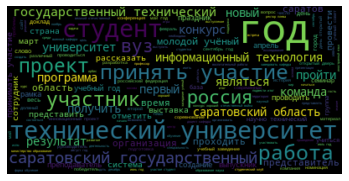

In [36]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Agglomerative Clustering

In [ ]:
clusters = ['Conferences',
            'Sport Competitions']

In [50]:
from sklearn.cluster import AgglomerativeClustering


agg = AgglomerativeClustering(n_clusters=6)
assignment = agg.fit_predict(X)



KMeans(n_clusters=3)

## K-means

In [ ]:
from sklearn.cluster import KMeans

# строим модель кластеризации
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

## KD-trees

## LSH

## Metrics